In [3]:
import numpy as np
import pandas as pd

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
tstamp = "2022_02_09_00_00_2022_02_08_09_13"
overview = pd.read_csv("results/overview_synthetic_data.csv")
overview.tail(10)

,tstamp,typ,outpath,u_ld_0,u_ld_1,emin,emax,alphamin,alphamax,betamin,betamax,size_lc,errval,spot_radius,midlat,latwidth,n_spots_min,n_spots_max,decomposeed,n_lcs
8,2022_02_08_07_35,train,results/2022_02_08_07_35_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,0.00001,1,3,decompose_ed_from_UCDs_and_Davenport,10000
9,2022_02_08_07_35,validate,results/2022_02_08_07_35_flares_validate.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,0.00001,1,3,decompose_ed_from_UCDs_and_Davenport,1000
10,2022_02_08_08_13,train,results/2022_02_08_08_13_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,0.00001,1,3,decompose_ed_from_UCDs_and_Davenport,100000
11,2022_02_08_08_13,validate,results/2022_02_08_08_13_flares_validate.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,0.00001,1,3,decompose_ed_from_UCDs_and_Davenport,10000
12,2022_02_08_09_13,train,results/2022_02_08_09_13_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,1.00000,1,3,decompose_ed_from_UCDs_and_Davenport,100000
13,2022_02_08_09_13,validate,results/2022_02_08_09_13_flares_validate.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,1.00000,1,3,decompose_ed_from_UCDs_and_Davenport,10000
14,2022_02_08_10_00,train,results/2022_02_08_10_00_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,5.00000,1,3,decompose_ed_from_UCDs_and_Davenport,100000
15,2022_02_08_10_00,validate,results/2022_02_08_10_00_flares_validate.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,30,2000,5.000000e-12,0.01,random,5.00000,1,3,decompose_ed_from_UCDs_and_Davenport,10000
16,2022_02_08_14_14,train,results/2022_02_08_14_14_flares_train.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,10,2000,5.000000e-12,0.01,random,5.00000,1,3,decompose_ed_from_UCDs_and_Davenport,100000
17,2022_02_08_14_14,validate,results/2022_02_08_14_14_flares_validate.csv,0.5079,0.2239,0.1,1000000.0,1.5,2.5,1,10,2000,5.000000e-12,0.01,random,5.00000,1,3,decompose_ed_from_UCDs_and_Davenport,10000


In [5]:
data= pd.read_csv(f"results/{tstamp[17:]}_flares_validate.csv")

In [6]:
data[["lat_deg_1","lat_deg_2","lat_deg_3"]].drop_duplicates()

,lat_deg_1,lat_deg_2,lat_deg_3
0,7.127093,7.178830,NaN
5,0.242085,-0.704925,-0.273842
33,-35.479591,35.602243,-34.808125
46,86.356893,NaN,NaN
62,25.849404,25.867133,25.844143
...,...,...,...
120041,77.647679,-77.788128,-77.732895
120060,2.376093,2.897380,NaN
120076,44.445985,45.057075,NaN
120085,20.129768,-20.059612,NaN


<AxesSubplot:xlabel='lat_deg_1', ylabel='lat_deg_2'>

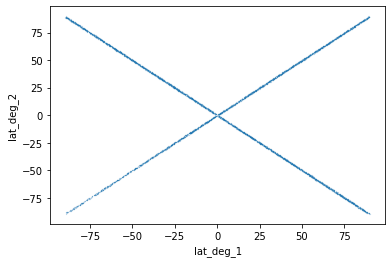

In [7]:
data[["lat_deg_1","lat_deg_2","lat_deg_3"]].drop_duplicates().plot(kind="scatter", x="lat_deg_1",y="lat_deg_2", s=.01)

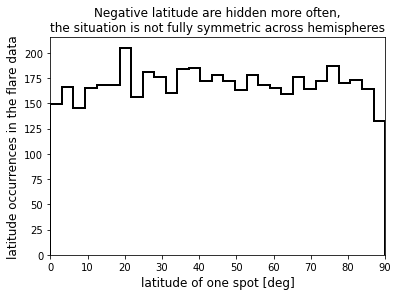

In [8]:
plt.figure(figsize=(6,4))
plt.hist(data.lat_deg_1.unique(), bins=np.linspace(0,90,30), histtype="step", edgecolor="k", linewidth=2)
plt.xlabel("latitude of one spot [deg]", fontsize=12)
plt.ylabel("latitude occurrences in the flare data", fontsize=12)
plt.title("Negative latitude are hidden more often,\n"
          "the situation is not fully symmetric across hemispheres");
plt.xlim(0,90);

In [9]:

metavals = overview[(overview.tstamp==tstamp[17:]) & (overview.typ == "train")].iloc[0]
meta = (f"Dataset {metavals.tstamp} with parameters:\n"
        f"alpha = {metavals.alphamin}-{metavals.alphamax}\n"
        f"beta = {metavals.betamin}-{metavals.betamax}\n"
        f"{metavals.n_spots_min}-{metavals.n_spots_max} spots\n"
        f"spot radius  = {metavals.spot_radius}\n"
        f"{metavals.n_lcs} light curves\n"
        f"ED decomposition: {metavals.decomposeed}\n"
        f"active latitude width {metavals.latwidth} deg\n")

In [10]:
df = pd.read_csv(f"results/{tstamp}_flares_train_merged.csv")
df.shape

(3030, 15)

In [11]:
df.head()

,midlat_deg,diff_tstart_std_over_mean_stepsize1,diff_tstart_std_over_count_stepsize1,diff_tstart_std_over_sum_stepsize1,diff_tstart_std_over_mean_stepsize2,diff_tstart_std_over_count_stepsize2,diff_tstart_std_over_sum_stepsize2,diff_tstart_std_over_mean_stepsize3,diff_tstart_std_over_count_stepsize3,diff_tstart_std_over_sum_stepsize3,midlat2,minlat,maxlat,latwidth,size
0,"(0.183, 0.778]",1.234761,0.001981,0.006603,0.863705,0.002634,0.005022,0.713465,0.003196,0.004544,0.480690,0.183325,0.778055,0.59473,400
1,"(0.778, 1.373]",1.573174,0.001988,0.005425,1.081990,0.002648,0.004146,0.903874,0.003226,0.003896,1.075420,0.778055,1.372785,0.59473,400
2,"(1.373, 1.968]",1.243492,0.001467,0.004441,0.929065,0.002148,0.003615,0.786304,0.002731,0.003332,1.670150,1.372785,1.967515,0.59473,400
3,"(1.968, 2.562]",1.453128,0.001907,0.005081,1.036778,0.002567,0.004034,0.850912,0.002979,0.003716,2.264879,1.967515,2.562244,0.59473,400
4,"(2.562, 3.157]",1.552810,0.001764,0.004086,1.099791,0.002438,0.003197,0.866941,0.002846,0.002797,2.859609,2.562244,3.156974,0.59473,400


In [12]:
colids = np.where([("diff" in x) for x in  df.columns.values])[0]
columns = df.columns.values[colids]
columns

array(['diff_tstart_std_over_mean_stepsize1',
       'diff_tstart_std_over_count_stepsize1',
       'diff_tstart_std_over_sum_stepsize1',
       'diff_tstart_std_over_mean_stepsize2',
       'diff_tstart_std_over_count_stepsize2',
       'diff_tstart_std_over_sum_stepsize2',
       'diff_tstart_std_over_mean_stepsize3',
       'diff_tstart_std_over_count_stepsize3',
       'diff_tstart_std_over_sum_stepsize3'], dtype=object)

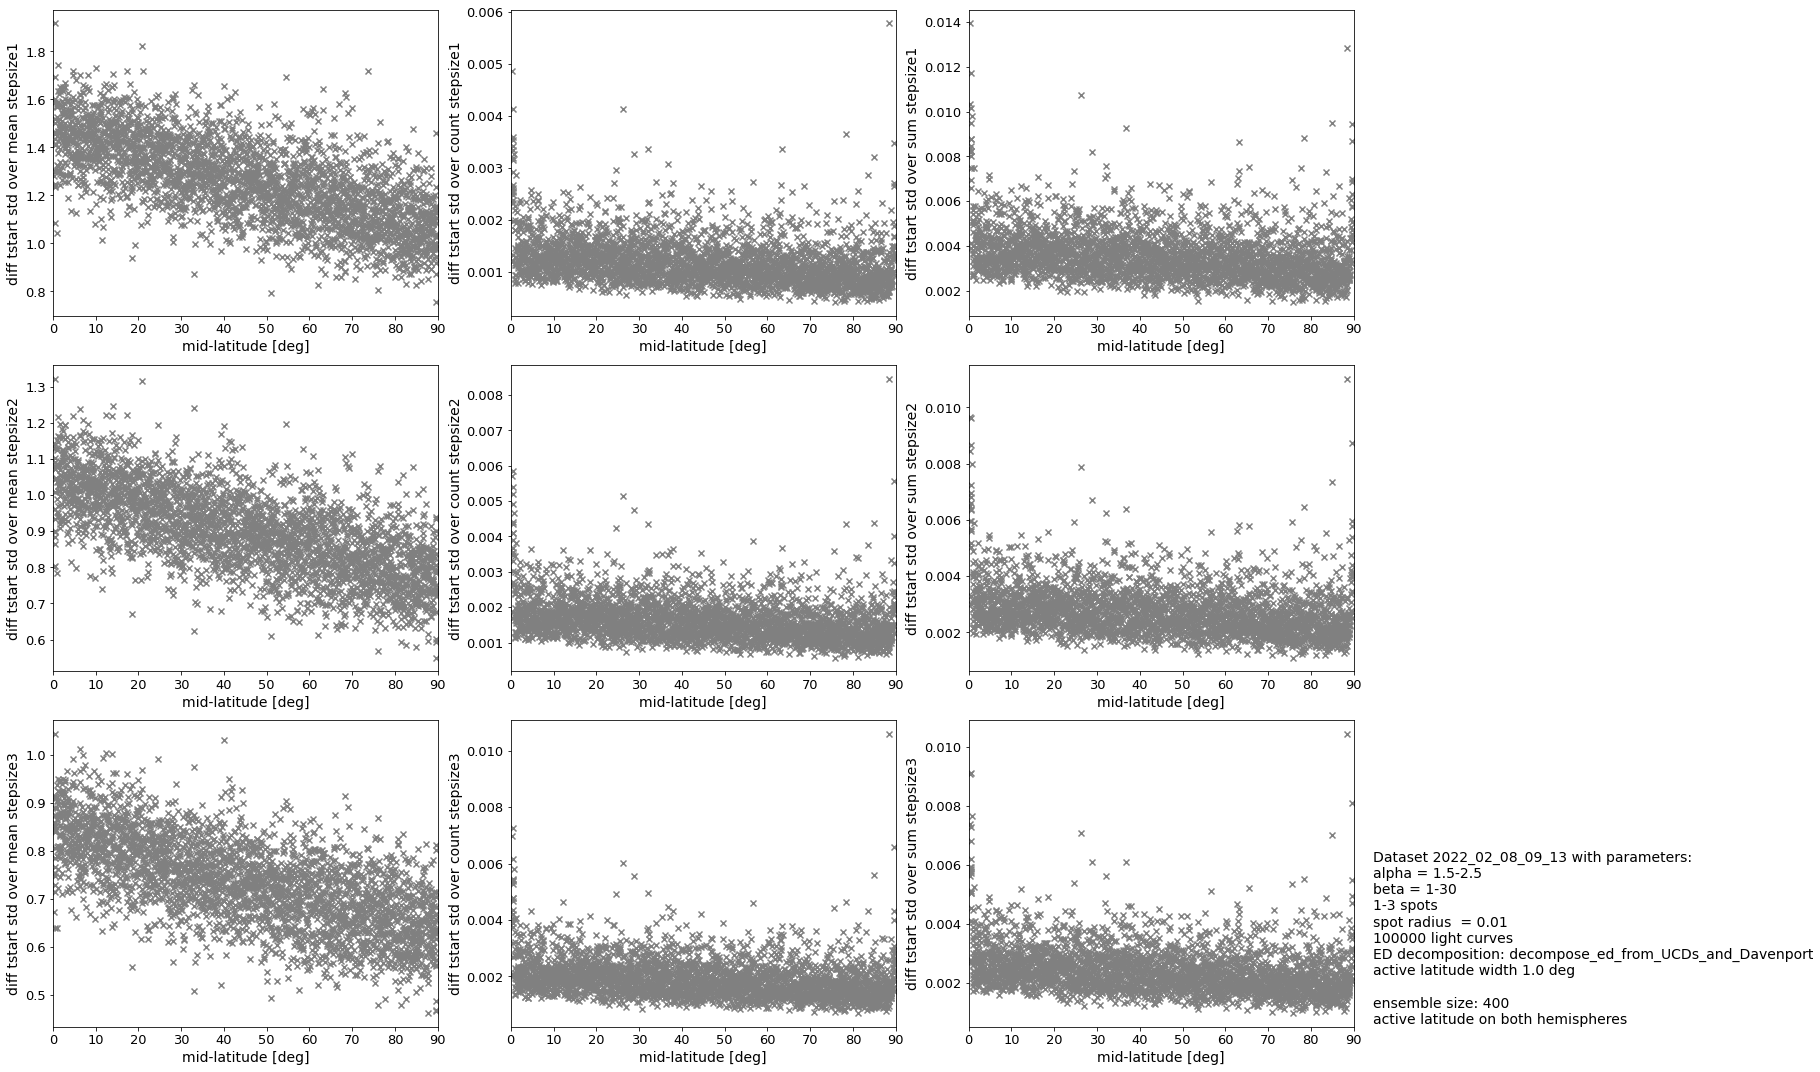

In [14]:
lats = df[["midlat_deg","midlat2","minlat","maxlat", "latwidth"]]
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(19,15))
axes = [a for ax in axes for a in ax]

for i, col in enumerate(columns):
    axes[i].scatter(df.midlat2, df[col], marker="x", c="grey")
    axes[i].set_ylabel(col.replace("_"," "), fontsize=14)
    axes[i].set_xlabel("mid-latitude [deg]", fontsize=14)
    axes[i].set_xlim(0,90)
    axes[i].tick_params(axis='x', labelsize=13)
    axes[i].tick_params(axis='y', labelsize=13)
plt.tight_layout();
string = meta + f"\nensemble size: {df['size'].iloc[0]}\nactive latitude on both hemispheres"
plt.text(x=1.05, y=.01, s=string, fontsize = 14, transform=axes[-1].transAxes);


In [14]:
df = df.fillna(-999)
df.head()

,midlat_deg,diff_tstart_kurtosis_stepsize1,diff_tstart_skew_stepsize1,diff_tstart_std_over_mean_stepsize1,diff_tstart_kurtosis_stepsize2,diff_tstart_skew_stepsize2,diff_tstart_std_over_mean_stepsize2,diff_tstart_kurtosis_stepsize3,diff_tstart_skew_stepsize3,diff_tstart_std_over_mean_stepsize3,midlat2,minlat,maxlat,latwidth,size
0,"(0.25, 3.231]",6.671934,2.516050,1.254373,1.619369,1.451576,0.837936,-0.272595,0.797384,0.666434,1.740491,0.249799,3.231184,2.981385,800
1,"(3.231, 6.213]",5.290376,2.261262,1.156394,1.089435,1.364203,0.803941,0.067548,0.967945,0.614442,4.721876,3.231184,6.212569,2.981385,800
2,"(6.213, 9.194]",6.799125,2.463286,1.133923,2.257387,1.578702,0.768386,0.340905,1.040387,0.609289,7.703261,6.212569,9.193954,2.981385,800
3,"(9.194, 12.175]",7.754094,2.471164,1.109188,2.619376,1.537822,0.748211,0.552717,1.021978,0.606193,10.684647,9.193954,12.175339,2.981385,800
4,"(12.175, 15.157]",6.938119,2.391906,1.111895,2.446405,1.488661,0.745594,0.785274,0.984778,0.583006,13.666032,12.175339,15.156724,2.981385,800


In [63]:
x = df[columns].values 
x.shape

(1927, 9)

In [64]:
y = df["midlat2"].values

In [65]:
# create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [66]:
# read validation data
valid = pd.read_csv(f"results/{tstamp}_flares_validate_merged.csv")
valid.head(10)

,midlat_deg,diff_tstart_kurtosis_stepsize1,diff_tstart_skew_stepsize1,diff_tstart_std_over_mean_stepsize1,diff_tstart_kurtosis_stepsize2,diff_tstart_skew_stepsize2,diff_tstart_std_over_mean_stepsize2,diff_tstart_kurtosis_stepsize3,diff_tstart_skew_stepsize3,diff_tstart_std_over_mean_stepsize3,midlat2,minlat,maxlat,latwidth
0,"(-88.945, -88.328]",2.240715,1.506082,1.131347,NaN,1.437308,0.671760,NaN,NaN,NaN,-88.636207,-88.944726,-88.327687,0.617039
1,"(-88.328, -87.711]",0.535107,0.981021,0.434954,-0.797552,0.770488,0.254660,-0.673549,-0.479386,0.195635,-88.019168,-88.327687,-87.710648,0.617039
2,"(-87.711, -87.094]",7.470343,2.710764,1.807605,4.210704,2.014528,1.303836,NaN,-1.489108,0.521602,-87.402129,-87.710648,-87.093609,0.617039
3,"(-87.094, -86.477]",16.192936,3.803742,1.508842,12.988213,3.115854,0.982889,11.453432,2.958660,0.825331,-86.785090,-87.093609,-86.476570,0.617039
4,"(-86.477, -85.86]",11.215804,3.259285,1.727092,3.983771,2.072095,1.137915,2.982810,1.818139,0.918081,-86.168051,-86.476570,-85.859531,0.617039
5,"(-85.86, -85.242]",23.254372,4.684638,2.244174,7.804889,2.956561,1.675316,4.664199,2.441767,1.394747,-85.551012,-85.859531,-85.242492,0.617039
6,"(-85.242, -84.625]",14.476902,3.142319,1.156711,3.667127,1.784929,0.802909,1.295372,1.151899,0.627239,-84.933973,-85.242492,-84.625453,0.617039
7,"(-84.625, -84.008]",22.973341,4.674092,2.042457,8.155250,2.975575,1.463004,5.003856,2.426643,1.178190,-84.316934,-84.625453,-84.008414,0.617039
8,"(-84.008, -83.391]",8.940983,2.910446,1.656228,5.336634,2.484322,1.438601,5.704704,2.541966,1.207379,-83.699895,-84.008414,-83.391375,0.617039
9,"(-83.391, -82.774]",10.799612,2.910064,1.381045,3.235458,1.698251,0.975291,0.668116,1.039605,0.769245,-83.082856,-83.391375,-82.774336,0.617039


In [77]:
valid = valid.fillna(-999)
validx = valid[columns].values 
validy = valid['midlat2'].values
validx.shape

(580, 9)

In [78]:
predictions = regressor.predict(validx)

In [79]:
errors = predictions - validy

In [80]:
feature_list = list(valid[columns].columns.values)

In [81]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
legend = "".join(["Feature importance:\n"] + ['{:.2f} -- {}\n'.format(*pair[::-1]) for pair in feature_importances])

In [82]:
extranote = "\nNote:\nactive latitude on one hemispheres\n2000 LCs per ensemble"
legend = meta + legend + extranote

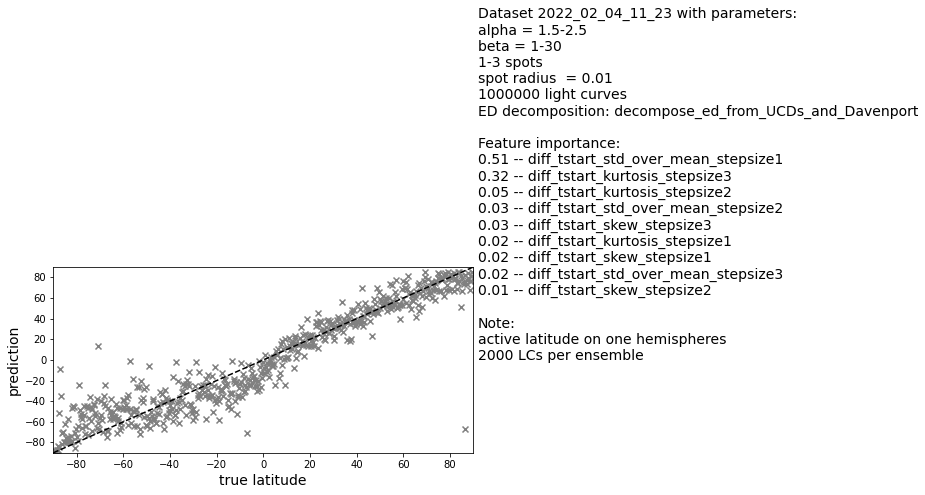

In [84]:
plt.figure(figsize=(13,6))
plt.scatter(validy, predictions, 
            marker="x",c="grey",)
plt.plot([-90,90], [-90,90], c="k", linestyle="dashed")
plt.xlim(-90,90)
plt.ylim(-90,90)
plt.xlabel("true latitude", fontsize=14)
plt.ylabel("prediction", fontsize=14)
plt.text(x=92, y=0,s=legend, fontsize=14)
plt.tight_layout()

## related notes

In [ ]:
from flares.decomposeed import decompose_ed_randomly_and_using_Davenport

Text(0, 0.5, 'FWHM [d]')

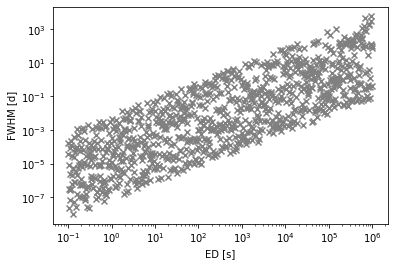

In [87]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, fwhm, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("FWHM [d]")

Text(0, 0.5, 'rel. amplitude')

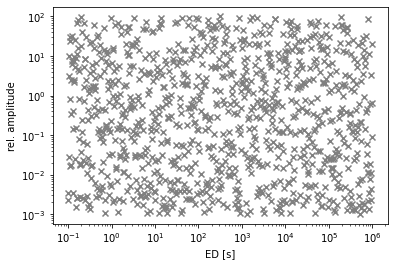

In [88]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, a, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("rel. amplitude")

In [23]:
dd = pd.read_csv("results/2022_01_10_flares_alpha_beta_rand.csv", names=['istart','istop','tstart','tstop',                  
                              'ed_rec','ed_rec_err','ampl_rec',
                              'dur','total_n_valid_data_points','midlat_deg',
                              'inclination_deg','n_spots','beta_1',
                              'beta_2','beta_3','alpha_1',
                              'alpha_2','alpha_3','lons_1',
                              'lons_2','lons_3','starid']
           )

<AxesSubplot:>

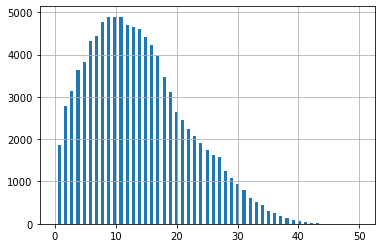

In [22]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))

<AxesSubplot:>

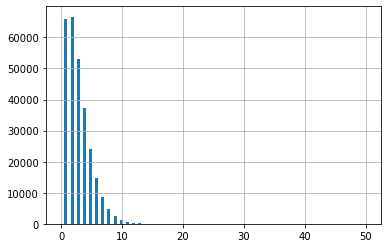

In [24]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))